# Workbook follows Section 1.1.3 of [Faraway 2002](https://cran.r-project.org/doc/contrib/Faraway-PRA.pdf)

Pima Indians Diabetes database taken from [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

**Note:** variable names differ from those in the book

In [42]:
# global change of figure sizes
# following: http://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html

library(repr)

options(repr.plot.width = 4, repr.plot.height = 3)

**Step 1.** Load data and pre-process

In [43]:
pima = read.csv("./datasets/pima.csv",header=TRUE)

In [44]:
summary(pima) # summary statistics

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [45]:
# strange that several fields have min = 0. Look at sorted values of Glucose
sort(pima$Glucose)

[1]   0   0   0   0   0  44  56  57  57  61  62  65  67  68  68  68  71  71
 [19]  71  71  72  73  73  73  74  74  74  74  75  75  76  76  77  77  78  78
 [37]  78  78  79  79  79  80  80  80  80  80  80  81  81  81  81  81  81  82
 [55]  82  82  83  83  83  83  83  83  84  84  84  84  84  84  84  84  84  84
 [73]  85  85  85  85  85  85  85  86  86  86  87  87  87  87  87  87  87  88
 [91]  88  88  88  88  88  88  88  88  89  89  89  89  89  89  90  90  90  90
[109]  90  90  90  90  90  90  90  91  91  91  91  91  91  91  91  91  92  92
[127]  92  92  92  92  92  92  92  93  93  93  93  93  93  93  94  94  94  94
[145]  94  94  94  95  95  95  95  95  95  95  95  95  95  95  95  95  96  96
[163]  96  96  96  96  96  96  97  97  97  97  97  97  97  97  97  98  98  98
[181]  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99 100
[199] 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 101 101
[217] 101 101 101 101 101 101 101 102 102 102 102 102 102 102 102 102 102 102
[235] 102 102 103 103 103 103 103 103 103 103 103 104 104 104 104 104 104 105
[253] 105 105 105 105 105 105 105 105 105 105 105 105 106 106 106 106 106 106
[271] 106 106 106 106 106 106 106 106 107 107 107 107 107 107 107 107 107 107
[289] 107 108 108 108 108 108 108 108 108 108 108 108 108 108 109 109 109 109
[307] 109 109 109 109 109 109 109 109 110 110 110 110 110 110 111 111 111 111
[325] 111 111 111 111 111 111 111 111 111 111 112 112 112 112 112 112 112 112
[343] 112 112 112 112 112 113 113 113 113 113 114 114 114 114 114 114 114 114
[361] 114 114 114 115 115 115 115 115 115 115 115 115 115 116 116 116 116 116
[379] 116 116 117 117 117 117 117 117 117 117 117 117 117 118 118 118 118 118
[397] 118 119 119 119 119 119 119 119 119 119 119 119 120 120 120 120 120 120
[415] 120 120 120 120 120 121 121 121 121 121 121 122 122 122 122 122 122 122
[433] 122 122 122 122 122 123 123 123 123 123 123 123 123 123 124 124 124 124
[451] 124 124 124 124 124 124 124 125 125 125 125 125 125 125 125 125 125 125
[469] 125 125 125 126 126 126 126 126 126 126 126 126 127 127 127 127 127 128
[487] 128 128 128 128 128 128 128 128 128 128 129 129 129 129 129 129 129 129
[505] 129 129 129 129 129 129 130 130 130 130 130 130 130 131 131 131 131 131
[523] 132 132 132 132 132 133 133 133 133 133 134 134 134 134 134 134 135 135
[541] 135 135 136 136 136 136 136 136 136 136 137 137 137 137 137 137 137 137
[559] 138 138 138 138 138 139 139 139 139 139 139 139 139 140 140 140 140 140
[577] 141 141 141 141 141 142 142 142 142 142 143 143 143 143 143 143 144 144
[595] 144 144 144 144 144 145 145 145 145 145 146 146 146 146 146 146 146 146
[613] 146 147 147 147 147 147 147 147 148 148 148 148 149 150 150 150 151 151
[631] 151 151 151 151 152 152 152 152 153 153 154 154 154 154 154 154 155 155
[649] 155 155 155 156 156 156 157 157 158 158 158 158 158 158 158 158 159 159
[667] 160 161 161 161 162 162 162 162 162 162 163 163 163 164 164 164 165 165
[685] 165 165 166 166 166 167 167 167 168 168 168 168 169 170 170 171 171 171
[703] 172 173 173 173 173 173 173 174 174 175 175 176 176 177 178 179 179 179
[721] 179 179 180 180 180 180 180 181 181 181 181 181 182 183 183 183 184 184
[739] 184 186 187 187 187 187 188 188 189 189 189 189 190 191 193 193 194 194
[757] 194 195 195 196 196 196 197 197 197 197 198 199

In [46]:
# set zero values to NA

pima$Glucose[pima$Glucose == 0] <- NA
pima$BloodPressure[pima$BloodPressure == 0] <- NA
pima$SkinThickness[pima$SkinThickness == 0] <- NA
pima$BMI[pima$BMI == 0] <- NA
pima$Insulin[pima$Insulin == 0] <- NA

In [47]:
# set Outcome to be a categorical (factor) variable
pima$Outcome <- factor(pima$Outcome)
summary(pima$Outcome)

0   1 
500 268

In [48]:
# rename categories of Outcome
levels(pima$Outcome) <- c("negative","positive")

In [49]:
# see updated summary of data
summary(pima)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   : 44.0   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 64.00   1st Qu.:22.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :29.00  
 Mean   : 3.845   Mean   :121.7   Mean   : 72.41   Mean   :29.15  
 3rd Qu.: 6.000   3rd Qu.:141.0   3rd Qu.: 80.00   3rd Qu.:36.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
                  NA's   :5       NA's   :35       NA's   :227    
    Insulin            BMI        DiabetesPedigreeFunction      Age       
 Min.   : 14.00   Min.   :18.20   Min.   :0.0780           Min.   :21.00  
 1st Qu.: 76.25   1st Qu.:27.50   1st Qu.:0.2437           1st Qu.:24.00  
 Median :125.00   Median :32.30   Median :0.3725           Median :29.00  
 Mean   :155.55   Mean   :32.46   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:190.00   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0

**Step 2.** Summary descriptive plots

**2.1** Univariate plots

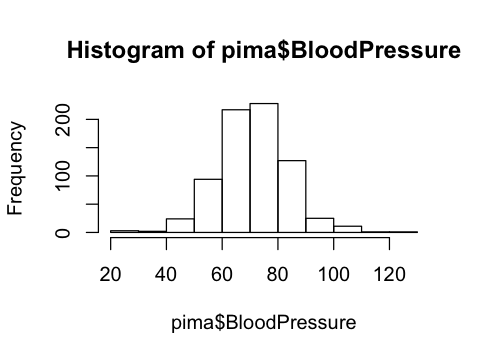

In [50]:
hist(pima$BloodPressure)

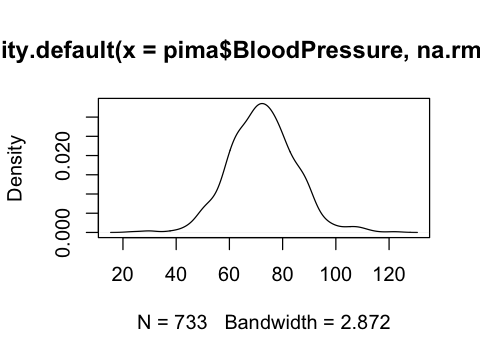

In [51]:
# Kernel density estimates -- smoothed histogram
plot(density(pima$BloodPressure,na.rm=TRUE)) 

In [52]:
# Index plot of sorted values
"""
advantages:
- see the individual data points
- see distribution and possible outliers
- see discreteness in measurements (can see values are rounded to nearest even number)
"""
plot(sort(pima$BloodPressure),pch='.')

ERROR: Error in parse(text = x, srcfile = src): <text>:2:3: unexpected string constant
6: - see discreteness in measurements (can see values are rounded to nearest even number)
7: "
     ^


**2.2** Bivariate plots

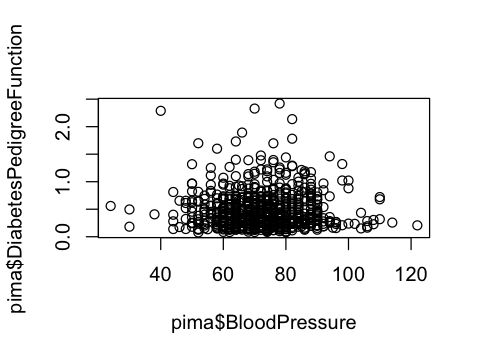

In [53]:
plot(pima$DiabetesPedigreeFunction ~ pima$BloodPressure)

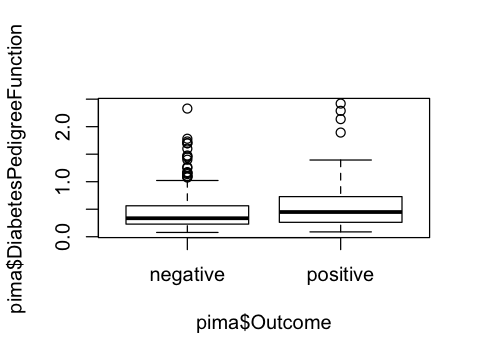

In [55]:
plot(pima$DiabetesPedigreeFunction ~ pima$Outcome)

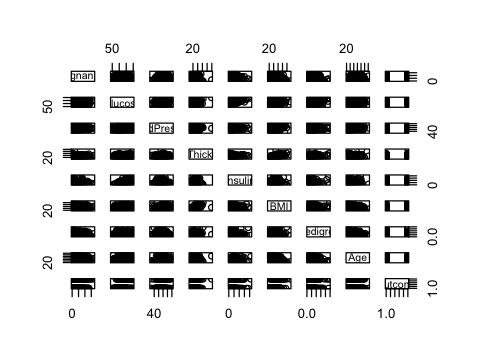

In [56]:
pairs(pima)